# Tugas 7 : Implementasi Fuzzy C-Means

Pada Tugas 7 diminta untuk melakukan pengelompokan berita dengan metode clustering yaitu Fuzzy C-Means.

Dibuat Oleh:

*   Nama : Sabil Ahmad Hidayat
*   NIM : 220411100058
*   Kelas : PPW A

Link Code : https://colab.research.google.com/drive/1sRYMNK7FcLm4iaVh1bVL8ylJ_hxlh9e5?usp=sharing

Link Github : https://github.com/meinhere/ppw/tree/master/publish/tugas-7

## Import Library

In [1]:
!pip install scikit-fuzzy

^C
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-fuzzy from https://files.pythonhosted.org/packages/9d/06/da70811f95c4a3bada55e7b20c957548a4d9bc21150916f0c024286d67c7/scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 920.8/920.8 kB 1.0 MB/s eta 0:00:00


In [ ]:
# library awal untuk perhitungan dan pengolahan teks
import numpy as np
import pandas as pd

# library untuk proses modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from skfuzzy.cluster import cmeans

# library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# load and save model
import pickle
import requests

## Preprocessing Data

### Load Data

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-2/dataset/test_df.csv', delimiter=',')

test_df.head()

,desc_clean_stem,label
0,jakarta kompas com wakil presiden wapres ma ru...,MONEY
1,jakarta kompas com pt layar nasional indonesia...,MONEY
2,jakarta kompas com kuota subsidi sepeda motor ...,OTOMOTIF
3,jakarta kompas com milik honda vario ganti tin...,OTOMOTIF
4,jakarta kompas com pt hutama karya persero tut...,OTOMOTIF


In [ ]:
github_raw_url = "https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-3/model/tfidf_vectorizer.sav"

response = requests.get(github_raw_url)
response.raise_for_status()

vectorizer = pickle.loads(response.content)
vectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


TfidfVectorizer()

In [ ]:
documents = test_df['desc_clean_stem'].tolist()
test = test_df['desc_clean_stem']
X = vectorizer.transform(test).toarray()

# Fuzzy c-means clustering
n_clusters = 2  # Number of clusters
fuzzy_cmeans = cmeans(X.T, n_clusters, m=2, error=0.005, maxiter=1000)

# Membership matrix
membership_matrix = fuzzy_cmeans[1]

# Assign documents to clusters based on maximum membership
clusters = np.argmax(membership_matrix, axis=0)

# Print cluster assignments
for i, doc in enumerate(documents):
    print(f"Document '{i+1}' belongs to cluster {clusters[i] + 1}")

Document '1' belongs to cluster 2
Document '2' belongs to cluster 1
Document '3' belongs to cluster 1
Document '4' belongs to cluster 1
Document '5' belongs to cluster 1
Document '6' belongs to cluster 2
Document '7' belongs to cluster 1
Document '8' belongs to cluster 2
Document '9' belongs to cluster 1
Document '10' belongs to cluster 2
Document '11' belongs to cluster 1
Document '12' belongs to cluster 1
Document '13' belongs to cluster 1
Document '14' belongs to cluster 2
Document '15' belongs to cluster 1
Document '16' belongs to cluster 2
Document '17' belongs to cluster 1
Document '18' belongs to cluster 1
Document '19' belongs to cluster 2
Document '20' belongs to cluster 2
Document '21' belongs to cluster 2
Document '22' belongs to cluster 2
Document '23' belongs to cluster 1
Document '24' belongs to cluster 2
Document '25' belongs to cluster 1
Document '26' belongs to cluster 1
Document '27' belongs to cluster 1
Document '28' belongs to cluster 2
Document '29' belongs to clus

In [ ]:
predictions = fuzzy_cmeans[1]
predictions = predictions.argmax(axis = 0)
predictions, np.unique(predictions, return_counts = True)

(array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1]),
 (array([0, 1]), array([48, 32])))

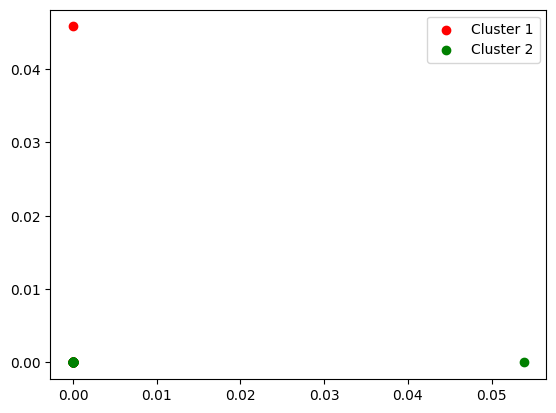

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], c = 'green', label = 'Cluster 2')
plt.legend();